<a href="https://colab.research.google.com/github/analluvias/ML-modelos-baseados-em-arvores/blob/master/ML_modelos_baseados_em_arvore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvore de decisão para classificação

In [30]:
import numpy as np

In [2]:
import pandas as pd

# URL dos datasets
url_breast_cancer_winscosin = "https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv"

# Lendo o arquivo diretamente do link
df = pd.read_csv(url_breast_cancer_winscosin)

# Visualizando as primeiras linhas
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [6]:
# Importando DecisionTreeClassifier de sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# instanciando uma arvore de classificação com profundidade máxima
dt = DecisionTreeClassifier(max_depth=6, random_state=42)

# Fit dt ao conjunto de teste
dt.fit(X_train, y_train)

# predizendo
y_pred = dt.predict(X_test)
print(y_pred[0:5])

['B' 'M' 'M' 'B' 'B']


In [8]:
# avaliando a primeira árvoce de decisão
from sklearn.metrics import accuracy_score

# predizendo as labels de teste
y_pred = dt.predict(X_test)

# computando a acurácia do conjunto de testes
accuracy_score(y_test, y_pred)

0.9385964912280702

In [9]:
# boa previsão de 93%

À saber sobre uma árvore de classificação sem restrições:

1. a existência de um nó depende do estados de seus predecessores
2. A impureza de um nó pode ser determinada usando diferentes critério, tal qual a entropia e o índice de gini
3. quando o ganho de informações resultante da divisão de um nó é nulo, o nó é declarado como uma folha

In [10]:
# usando a entropia como critério

In [12]:
dt_entropia = DecisionTreeClassifier(max_depth = 8, criterion="entropy", random_state = 42)

dt_entropia.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)

In [13]:
# predizendo o conjunto de testes com o novo modelo
y_pred = dt_entropia.predict(X_test)

#Avaliando a acurácia com o uso do critério entropia
accuracy_score(y_test, y_pred)

0.9473684210526315

podemos ver que as acurácias alcançadas pelos modelos que utilizaram entropia vs modelo que utilizou gini (é o critério padrão para dt) são praticamente as mesmas

# Árvore de decisão para regressão

vamos usar o dataset auto-mpg para prever o consumo de milhas por galão

In [16]:
url_mpg = "https://assets.datacamp.com/production/repositories/1796/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv"

# Lendo o arquivo diretamente do link
df = pd.read_csv(url_mpg)

# Visualizando as primeiras linhas
df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [19]:
# transformando a coluna origin em oneHotEncoder

df_encoded = pd.get_dummies(df, columns=['origin'], dtype=int)
print(df_encoded)

      mpg  displ   hp  weight  accel  size  origin_Asia  origin_Europe  \
0    18.0  250.0   88    3139   14.5  15.0            0              0   
1     9.0  304.0  193    4732   18.5  20.0            0              0   
2    36.1   91.0   60    1800   16.4  10.0            1              0   
3    18.5  250.0   98    3525   19.0  15.0            0              0   
4    34.3   97.0   78    2188   15.8  10.0            0              1   
..    ...    ...  ...     ...    ...   ...          ...            ...   
387  18.0  250.0   88    3021   16.5  15.0            0              0   
388  27.0  151.0   90    2950   17.3  10.0            0              0   
389  29.5   98.0   68    2135   16.6  10.0            1              0   
390  17.5  250.0  110    3520   16.4  15.0            0              0   
391  25.1  140.0   88    2720   15.4  10.0            0              0   

     origin_US  
0            1  
1            1  
2            0  
3            1  
4            0  
..       

In [20]:
X = df_encoded.drop(columns=["mpg"])
y = df_encoded["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=42)

# ajustando o modelos
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=42)

In [35]:
from sklearn.metrics import mean_squared_error as MSE

# Complexidade, viés e variação

à medidade que a complexidade da função que vai descreve o modelo aumento, o termo de tendência (bias) diminui -> a função não ficará "reta", enquanto o termo de variação aumenta "ganha mais curvas"

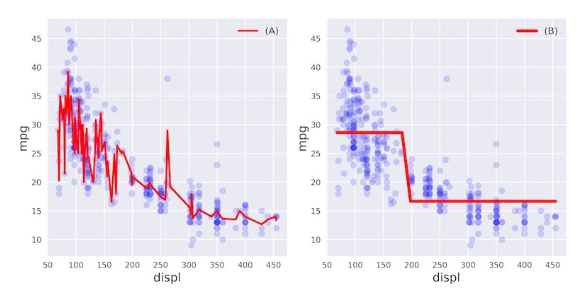

nas duas funções acima, a primeira está com uma alta variação e baixa tendência. Já a segunda apresenta uma tendencia elevada (de se manter como está) com uma baixíssima variação

In [26]:
# vamos diagnosticar os problemas de viés e variação

from sklearn.model_selection import cross_val_score

# para isso, primeiro vamos computar o array contendo 10-folds cv MSE
# a validação cruzada é uma ótima técnica para obter uma estimativa do desempenho
# de um modelo sem afetar o conjunto de testes
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

In [27]:
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

RMSE_CV

np.float64(4.237812038219306)

In [29]:
# agora vamos avaliar o conjunto de treinamento via RMSE

y_pred_train = dt.predict(X_train)
RMSE_train= (MSE(y_train, y_pred_train))**(1/2)
RMSE_train

3.8534380666508046

In [33]:
y_pred_test = dt.predict(X_test)
RMSE_test= (MSE(y_test, y_pred_test))**(1/2)
RMSE_test

4.818124210449817

In [32]:
# Previsão baseline: sempre prever a média do conjunto de treino
y_pred_baseline = np.full_like(y_test, y_train.mean())

# Calcular o RMSE baseline
rmse_baseline = (MSE(y_test, y_pred_baseline)) ** 0.5
rmse_baseline

8.028907926822

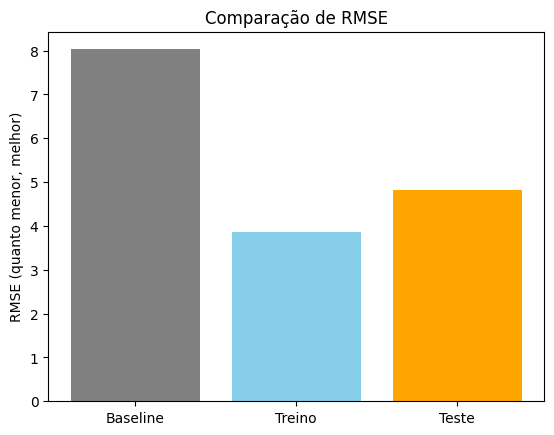

In [34]:
import matplotlib.pyplot as plt

rmse_values = [rmse_baseline, RMSE_train, RMSE_test]
labels = ['Baseline', 'Treino', 'Teste']

plt.bar(labels, rmse_values, color=['gray', 'skyblue', 'orange'])
plt.title('Comparação de RMSE')
plt.ylabel('RMSE (quanto menor, melhor)')
plt.show()

### resultados:
Métrica -	Valor (aprox.): Interpretação

RMSE_train	- 3.85: erro médio do modelo no treino

RMSE_test	- 4.82: erro médio do modelo no teste

RMSE_baseline	- 8.03: erro médio se você só previsse a média (modelo bobo)


###O que significa:

Comparando o modelo com o baseline:

RMSE_baseline = 8.03

RMSE_test = 4.82

Isso quer dizer que o modelo é muito melhor do que simplesmente chutar a média do treino.
Ele reduziu o erro em quase 40%, o que é um excelente sinal
Portanto, o modelo aprendeu um padrão real nos dados.

### Comparando treino vs teste:

RMSE_train = 3.85

RMSE_test = 4.82

A diferença é pequena — o modelo tem um pouco mais de erro no teste (o que é normal),mas não é uma diferença grande o bastante para indicar overfitting.

### Assim, concluimos que o modelo está bem equilibrado — nem superajustado, nem subajustado.